In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:

A = np.array([
    0,1,1,1,0,
    1,0,0,0,1,
    1,1,1,1,1,
    1,0,0,0,1,
    1,0,0,0,1,
    1,0,0,0,1
])


B = np.array([
    1,1,1,1,0,
    1,0,0,0,1,
    1,1,1,1,0,
    1,0,0,0,1,
    1,0,0,0,1,
    1,1,1,1,0
])

C = np.array([
    0,1,1,1,1,
    1,0,0,0,0,
    1,0,0,0,0,
    1,0,0,0,0,
    1,0,0,0,0,
    0,1,1,1,1
])


In [4]:
X = np.array([A, B, C])  


y = np.array([
    [1, 0, 0],  # A
    [0, 1, 0],  # B
    [0, 0, 1]   # C
])


In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


In [6]:
np.random.seed(42)

input_size = 30
hidden_size = 16
output_size = 3
learning_rate = 0.5
epochs = 2000

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))


In [7]:
losses = []
accuracies = []

for epoch in range(epochs):
    # Forward pass
    hidden_input = np.dot(X, W1) + b1
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, W2) + b2
    output = sigmoid(final_input)

    # Loss (MSE)
    loss = np.mean((y - output) ** 2)
    losses.append(loss)

    # Accuracy
    predictions = np.argmax(output, axis=1)
    actual = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == actual)
    accuracies.append(accuracy)

    # Backpropagation
    error_output = y - output
    delta_output = error_output * sigmoid_derivative(output)

    error_hidden = np.dot(delta_output, W2.T)
    delta_hidden = error_hidden * sigmoid_derivative(hidden_output)

    # Update weights
    W2 += hidden_output.T.dot(delta_output) * learning_rate
    b2 += np.sum(delta_output, axis=0, keepdims=True) * learning_rate

    W1 += X.T.dot(delta_hidden) * learning_rate
    b1 += np.sum(delta_hidden, axis=0, keepdims=True) * learning_rate

    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {accuracy*100:.2f}%")


Epoch 0, Loss: 0.4418, Accuracy: 33.33%
Epoch 500, Loss: 0.0011, Accuracy: 100.00%
Epoch 1000, Loss: 0.0004, Accuracy: 100.00%
Epoch 1500, Loss: 0.0003, Accuracy: 100.00%


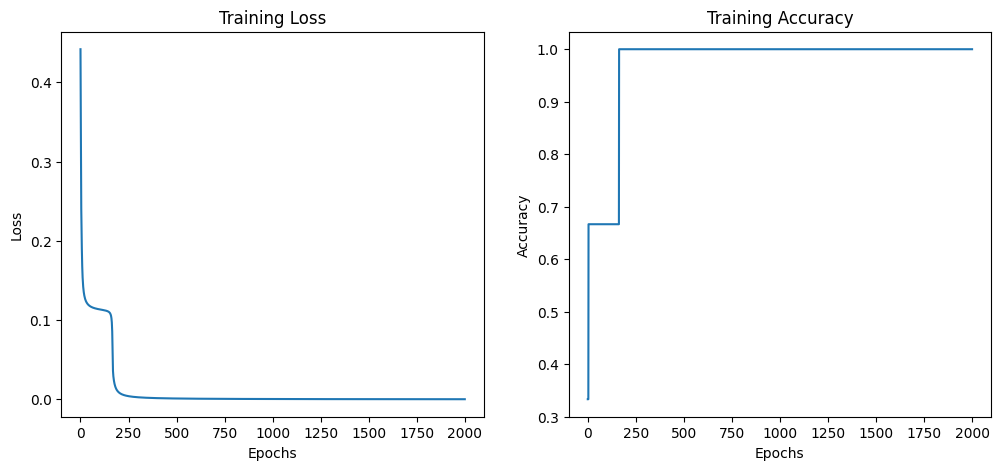

In [8]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.plot(accuracies)
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.show()


Predicted Letter: A


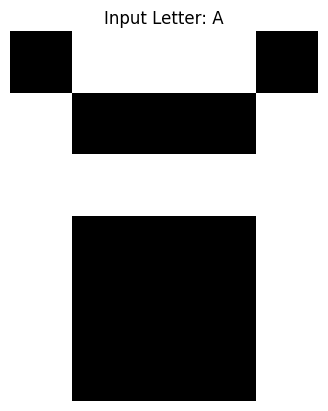

Predicted Letter: B


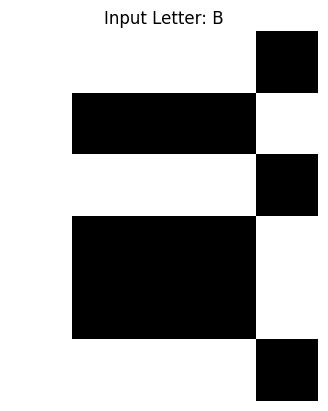

Predicted Letter: C


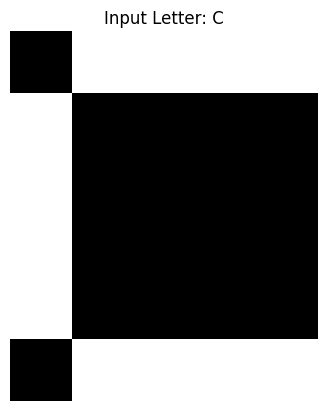

In [9]:
def predict(letter, name):
    hidden = sigmoid(np.dot(letter, W1) + b1)
    output = sigmoid(np.dot(hidden, W2) + b2)
    prediction = np.argmax(output)

    labels = ["A", "B", "C"]
    print(f"Predicted Letter: {labels[prediction]}")

    plt.imshow(letter.reshape(6,5), cmap="gray")
    plt.title(f"Input Letter: {name}")
    plt.axis("off")
    plt.show()

predict(A, "A")
predict(B, "B")
predict(C, "C")
